# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease given their medical attributes

### The following approach will be taken in evaluating this problem:
* 1. Problem definition
* 2. Handling data
* 3. Evaluation
* 4. Feature
* 5. Determining model
* 6. Exprerimentation/Improvements

## 1. Problem definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease at a relatively high success rate?

## 2. Data

The original data came from the Cleveland database from the UCI Machine Learning Repository
https://www.kaggle.com/ronitf/heart-disease-uci
https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation

> If 92% accuracy at predicting whether or not a patient has heart disease during this project will be considered a success.

## 4. Features



**Data Dictionary**

i.e. information about features

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Importing tools necessary for analysis

In [1]:
#import tools needed

#Regular data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

#show plots in notebook
%matplotlib inline 

#sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import plot_roc_curve


## Load data

In [3]:
df = pd.read_csv("heart.csv")
df.shape #rows, columns

(303, 14)

## Data Exploration

A few questions that I would like to answer while exploring the data.

1. What types of data do I have to work with?

2. Is there missing data? How should I fill it?

3. Are there outliers in the data? Is there meaningful information derived from the outliers?

4. what correlations in the data can I find with relative ease?

In [4]:
#relatively balanced dataset
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

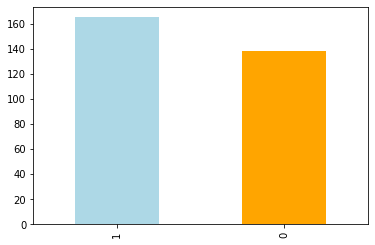

In [6]:
#visual depiction of dataset balance
df["target"].value_counts().plot(kind="bar", color=["lightblue", "orange"]);

In [11]:
#Question 1. Answered, all ints and floats
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
#Question 2. answered: no missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart Disease Frequency according to Sex attribute

In [14]:
#data has more male than female
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


### According to Data, Females are more likely to have heart disease

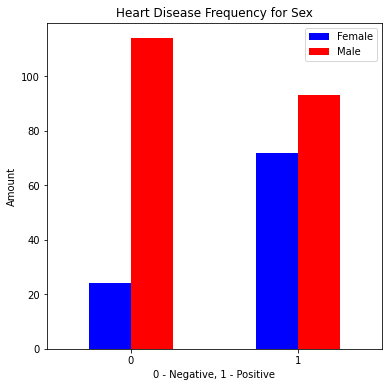

In [30]:
#create plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(6,6), color=["blue", "red"]);

#prettify plot
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 - Negative, 1 - Positive")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.legend(["Female","Male"]);